# Neural Network from Scratch in TensorFlow

In [58]:
# Now we will build a Neural Network model together. We will accomplish it in by completing each task in the project:
# 
# Task 1: Introduction
# Task 2: Initializing Neural Network
# Task 3: Forward Pass
# Task 4: Compute Loss and Update Parameters
# Task 5: Predict and Info Functions
# Task 6: Training on Batch
# Task 7: Training on Complete Set
# Task 8: Application
# Task 9: Results

# 1: Introduction and Importing Librarie

In [3]:
!pip install nn_utils

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nn_utils
%matplotlib inline

print('TensorFlow Version:', tf.__version__)

TensorFlow Version: 2.0.0


# 2: Initializing Neural Network

In [59]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.L = len(layers)
        self.num_features = layers[0]
        self.num_classes = layers[-1]
        
        self.W = {}
        self.b = {}
        
        self.dW = {}
        self.db = {}
        
        self.setup()
        
    def setup(self):
        
        for i in range(1,self.L):
            self.W[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape=(self.layers[i],1)))

# 3: Forward Pass

In [60]:
class NeuralNetwork(NeuralNetwork):
    def forward_pass(self, X):
        A = tf.convert_to_tensor(X,dtype=tf.float32)
        for i in range(1,self.L):
            Z = tf.matmul(A,tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i != self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

# 4: Computing Loss and Updating Parameters

In [61]:
class NeuralNetwork(NeuralNetwork):
    
    def compute_loss(self,A,Y):
        loss = tf.nn.softmax_cross_entropy_with_logits(Y,A)
        return tf.reduce_mean(loss)
    
    def update_params(self,lr):
        for i in range(1,self.L):
            self.W[i].assign_sub(lr*self.dW[i])
            self.b[i].assign_sub(lr*self.db[i])

# 5: Predict and Info Functions

In [62]:
class NeuralNetwork(NeuralNetwork):
    def predict(self, X):
        
        A = self.forward_pass(X)
        return tf.argmax(tf.nn.softmax(A),axis=1)
          

    def info(self):
        num_params = 0
        
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self.b[i].shape[0]

        print('Input Features:', self.num_features)
        print('Number of Classes:', self.num_classes)
        print('Hidden Layers:')
        print('--------------')
        for i in range(1, self.L-1):

            print('Layer {}, Units {}'.format(i, self.layers[i]))

        print('--------------')
        print('Number of parameters:', num_params)

# 6: Training on Batch



In [63]:
class NeuralNetwork(NeuralNetwork):

    def train_on_batch(self, X, Y, lr):
        X = tf.convert_to_tensor(X,dtype=tf.float32)
        Y = tf.convert_to_tensor(Y,dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forward_pass(X)
            loss = self.compute_loss(A,Y)
        
        for i in range(1,self.L):
            self.dW[i] = tape.gradient(loss, self.W[i])
            self.db[i] = tape.gradient(loss, self.b[i])
            
        del tape
        
        self.update_params(lr)
        return loss.numpy()            

# 7: Training on Complete Set

In [64]:
class NeuralNetwork(NeuralNetwork):
    def train(self, x_train, y_train, x_test, y_test, epochs, steps_per_epoch, batch_size, lr):

        history = {
            'val_loss': [],
            'train_loss': [],
            'val_accu': []            
        }
        
        for e in range(0,epochs):
            epoch_train_loss = 0,
            print('Epoch  {}'.format(e), end='.')
            for i in range(0,steps_per_epoch):
                x_batch = x_train[i*batch_size:(i+1)*batch_size]
                y_batch = y_train[i*batch_size:(i+1)*batch_size]
                
                batch_loss = self.train_on_batch(x_batch, y_batch, lr)
                epoch_train_loss += batch_loss
                
                if i%int(steps_per_epoch/10) ==0:
                    print(end='.')
            
            history['train_loss'].append(epoch_train_loss/steps_per_epoch)
            val_A = self.forward_pass(x_test)
            val_loss = self.compute_loss(val_A,y_test).numpy()
            history['val_loss'].append(val_loss)
            val_preds = self.predict(x_test)
            val_acc = np.mean(np.argmax(y_test, axis=1) == val_preds.numpy())
            history['val_accu'].append(val_acc)
            print('Val acc: ', val_acc)
        
        return history

# 8: Application

In [100]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

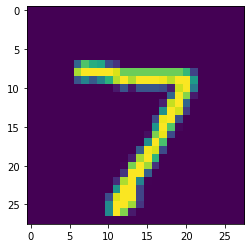

In [102]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_test[0]);

In [94]:
print("Original X shape", x_train.shape)
print("Original Y shape", x_train.shape)

# Reshape data.
x_train = x_train.reshape(60000, 784)
#x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') 
x_test  = x_test.astype('float32')
x_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
#x_test  /= 255
print("Training X matrix shape", x_train.shape)
print("Testing X matrix shape", x_test.shape)
print (y_train[0])
    
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
# y_test  = tf.keras.utils.to_categorical(y_test, nb_classes)
print("Training Y matrix shape", y_train.shape)
# print("Testing Y matrix shape", y_test.shape)

Original X shape (60000, 28, 28)
Original Y shape (60000, 28, 28)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 28, 28)
5
Training Y matrix shape (60000, 10)


In [68]:
net = NeuralNetwork([784,128,128,10])
net.info()

Input Features: 784
Number of Classes: 10
Hidden Layers:
--------------
Layer 1, Units 128
Layer 2, Units 128
--------------
Number of parameters: 118282


In [69]:
batch_size = 120
epochs = 5
steps_per_epoch = int(x_train.shape[0]/batch_size)
lr = 3e-3
print('Steps per epoch ', steps_per_epoch)

Steps per epoch  500


In [70]:
history = net.train(
    x_train,y_train,
    x_test, y_test,
    epochs, steps_per_epoch,
    batch_size, lr
)

Epoch  0...........Val acc:  0.8126
Epoch  1...........Val acc:  0.8444
Epoch  2...........Val acc:  0.8559
Epoch  3...........Val acc:  0.8654
Epoch  4...........Val acc:  0.8722


#  9: Results

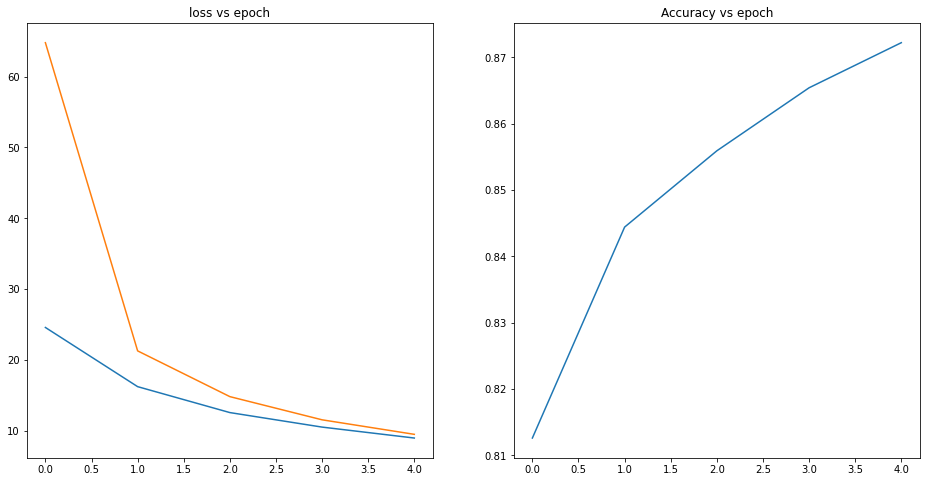

In [95]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),history['val_loss'])
plt.plot(range(epochs),history['train_loss'])
plt.title('loss vs epoch');
plt.subplot(1,2,2)
plt.plot(range(epochs),history['val_accu'])
plt.title('Accuracy vs epoch');

In [83]:
pred = net.predict(x_test)

In [84]:
pred.numpy()

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [85]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

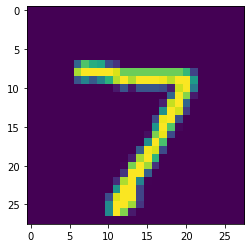

In [103]:
plt.figure()
plt.imshow(x_test[0])

In [104]:
x_test.shape

(10000, 28, 28)

In [105]:
y_test.shape

(10000,)